# Machine Learning Lab

This lab is aimed to walk you through the complete workflow of a machine learning project; from data wrangling, exploratory data analysis (EDA), model training and model evaluation/comparison. 

You will work with your machine project teamates for this lab and your team needs to decide whether to use either R or Python as the main programming language. **Each team memeber needs to work on his/her own submission.**

We will use Github for team collaboration. There is a [TL;DR](https://gist.github.com/Chaser324/ce0505fbed06b947d962) of how do programmers work together on Github or we can break it down into following steps:

1. The team leader creates a public Github repository under his/her account first.

2. All the other team members fork the repo so you will have a COPY of the repo under your account

3. Git clone YOUR OWN repo otherwise you won't be able to push later.

4. Create a subfolder under your name and finish your code. Push the changes to Github.

5. Go to the Github page of YOUR OWN repository and click the "Pull Request" tab. You can find the details [here]
(https://help.github.com/articles/creating-a-pull-request-from-a-fork/)

6. Submit the pull request so you can see it under team leader's repository.

7. Pair review each other's code before merging it to the master branch.


**Homework**
To understand fork, pull request and branch better, review [this video](https://youtu.be/_NrSWLQsDL4) in 1.25X speed.


## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.


### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.


## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”


#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID


### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.


In [87]:
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import datetime


In [5]:
orders_dt = pd.read_csv("./data/Orders.csv")

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


In [6]:
orders_dt.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [42]:
len(orders_dt["Product.ID"].unique())

3788

In [44]:
len(orders_dt["Category"].unique())

3

In [24]:
orders_dt.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [33]:
orders_dt.Profit = orders_dt.Profit.map(lambda s: str(s).replace('$', '').replace(',','')).astype("float")
orders_dt.Sales = orders_dt.Sales.map(lambda s: str(s).replace('$', '').replace(',','')).astype("float")

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.



In [148]:
orders_dt['Order.Date'] = pd.to_datetime(orders_dt['Order.Date'], format="%m/%d/%y")
orders_dt['Order.month'] = orders_dt['Order.Date'].map(lambda x: x.month)
orders_dt['Order.year'] = orders_dt['Order.Date'].map(lambda x: x.year)

In [ ]:
orders_dt.groupby('Order.month')

In [ ]:
pd.to_datetime(orders_dt['Order.Date'], format="%m/%d/%y")

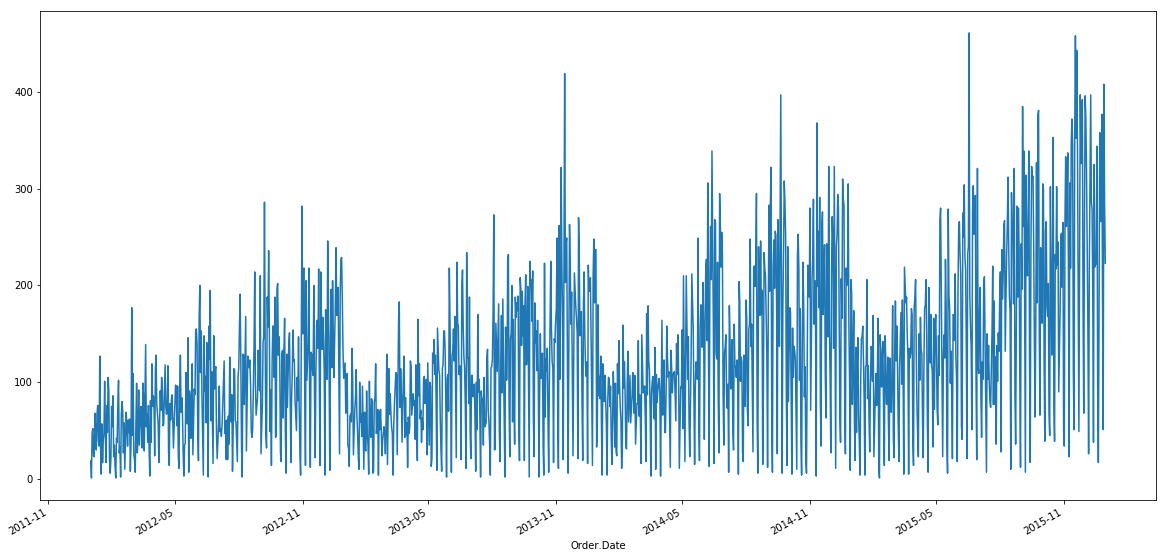

In [83]:
orders_dt.groupby('Order.Date').agg('sum')['Quantity'].plot(figsize=(20,10))
plt.show()


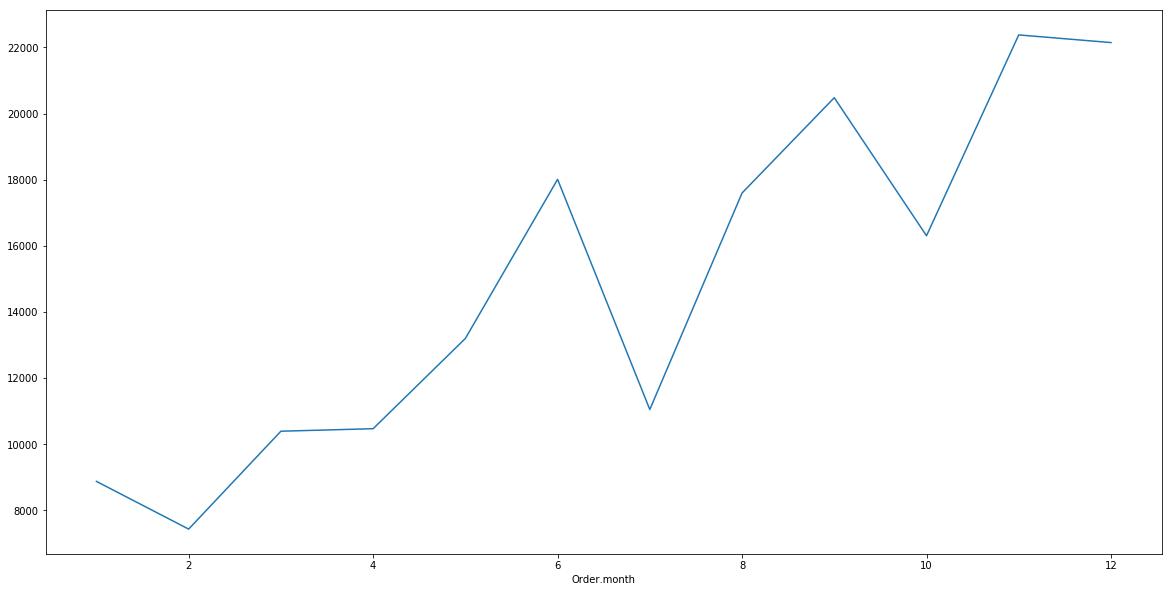

In [86]:
orders_dt.groupby('Order.month').agg('sum')['Quantity'].plot(figsize=(20,10))
plt.show()

In [ ]:
import pandas as pd

grouped_df = df1.groupby( [ "Name", "City"] )


#pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))

In [197]:
dt = orders_dt[['Category', 'Order.Date', 'Quantity']].groupby(['Category', 'Order.Date']).agg('sum')[['Quantity']]
dt = dt.reset_index()

In [201]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(dt, col="Category", row="Order.Date").map(plt.bar, "Quantity")

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000020C1B2769D8> (for post_execute):


ValueError: Image size of 648x308880 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 648x308880 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 648x308880 with 2769 Axes>

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`

In [96]:
returns_dt = pd.read_csv("./data/Returns.csv")

In [97]:
returns_dt.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [155]:
full_dt = orders_dt.merge(returns_dt, how="left", left_on="Order.ID", right_on="Order ID")
full_dt.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.month,Order.year,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.77,High,11,2014,NaN,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.63,Critical,2,2014,NaN,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.97,915.49,Medium,10,2014,NaN,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.54,910.16,Medium,1,2014,NaN,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.52,903.04,Critical,11,2014,NaN,NaN,NaN


In [157]:
# 1. How much profit did we lose due to returns each year? - $61,370.75
returned = full_dt.loc[full_dt.Returned == 'Yes']
returned.groupby('Order.year').agg('sum')['Profit']

Order.year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

In [163]:
# 2. How many customer returned more than once? more than 5 times? - 547, 46
df = returned[['Customer.ID', 'Order.ID']].groupby('Customer.ID').agg('count')[['Order.ID']]

In [171]:
print(len(df.loc[df['Order.ID'] > 1]))
print(len(df.loc[df['Order.ID'] > 5]))

547
46


In [174]:
#3. Which regions are more likely to return orders? - Central Amaerica, Western Europe, Western US...
returned.groupby('Region_y').agg('count')['Order.ID'].sort_values(ascending=False)

Region_y
Central America      248
Western Europe       233
Western US           180
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            71
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Eastern Canada        10
Central Asia           9
Western Canada         5
Name: Order.ID, dtype: int64

In [175]:
# 4. Which categories (sub-categories) of products are more likely to be returned? - Binders, Art, Storage, Paper...
returned.groupby('Sub.Category').agg('count')['Order.ID'].sort_values(ascending=False)

Sub.Category
Binders        269
Art            217
Storage        212
Paper          150
Chairs         147
Phones         145
Accessories    138
Labels         137
Furnishings    135
Bookcases      104
Supplies       103
Fasteners      102
Copiers         99
Envelopes       99
Machines        63
Appliances      59
Tables          41
Name: Order.ID, dtype: int64